In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sys import platform
import warnings

if platform == "win32":
    path = 'C:/Users/olive/GitHub/f1-analytics/'
elif platform == "darwin":
    # path = '~/Documents/GitHub/f1-analytics/'
    path = '/Users/oliverjcarter/Documents/GitHub/f1-analytics/'

warnings.filterwarnings("ignore", category=RuntimeWarning) 
pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [4]:
data = pd.read_csv(path+'data/qualifying.csv')
merged = pd.read_csv(path+'data/merged.csv')

In [6]:
data.head(22)

,grid,pos,season,round,driver,constructor,final_time,stage,q_delta
0,1,1,2014,1,Lewis Hamilton HAM,Mercedes,104.231,q3,0.000
1,2,2,2014,1,Daniel Ricciardo RIC,Red Bull Racing Renault,104.548,q3,0.317
2,3,3,2014,1,Nico Rosberg ROS,Mercedes,104.595,q3,0.364
3,4,4,2014,1,Kevin Magnussen MAG,McLaren Mercedes,105.745,q3,1.514
4,5,5,2014,1,Fernando Alonso ALO,Ferrari,105.819,q3,1.588
5,6,6,2014,1,Jean-Eric Vergne VER,STR Renault,105.864,q3,1.633
6,7,7,2014,1,Nico Hulkenberg HUL,Force India Mercedes,106.030,q3,1.799
7,8,8,2014,1,Daniil Kvyat KVY,STR Renault,107.368,q3,3.137
8,9,9,2014,1,Felipe Massa MAS,Williams Mercedes,108.079,q3,3.848
9,10,11,2014,1,Jenson Button BUT,McLaren Mercedes,104.437,q2,0.206


In [36]:
circuit_time = merged.groupby(
    'circuit_id').agg(
    {
        'final_time': 'mean'
    }
)

circuit_time

,final_time
circuit_id,
albert_park,88.029782
americas,94.564383
bahrain,86.279284
baku,102.757604
catalunya,80.376013
hockenheimring,74.349692
hungaroring,81.131769
imola,74.569263
interlagos,69.949867


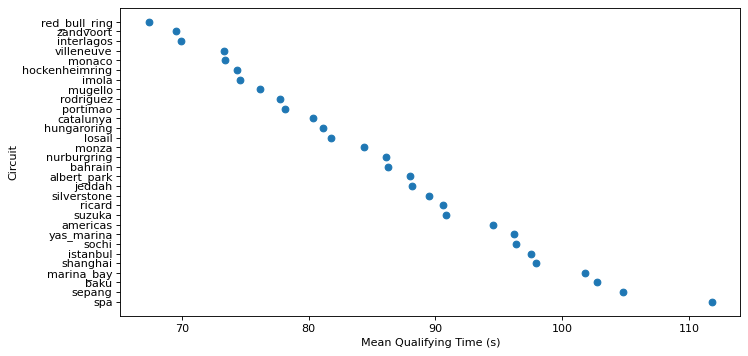

In [37]:
q_times_by_circuit = circuit_time.copy().sort_values('final_time', ascending=False)
# q_times_by_circuit

y = q_times_by_circuit.index
x = q_times_by_circuit.values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('')
axs.set_xlabel('Mean Qualifying Time (s)')
axs.set_ylabel('Circuit')
axs.scatter(x, y)

/var/folders/yr/_c96mt814gvfyzflkx16n3xw0000gn/T/ipykernel_15519/1776888974.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(np.unique(delta_sd['circuit_id']), rotation=90)


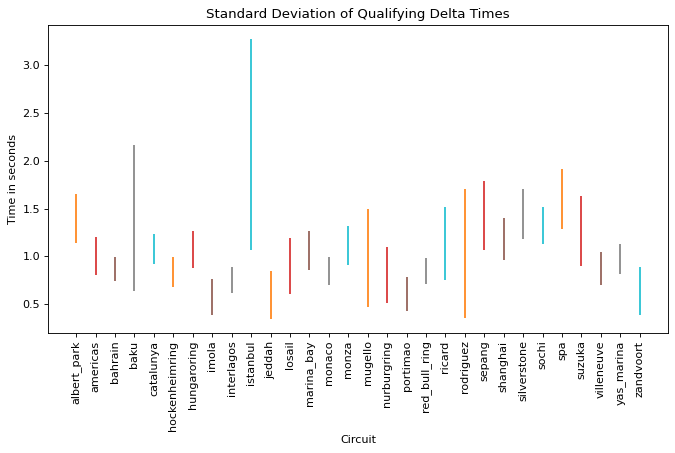

In [77]:
delta_sd = merged.copy()

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Standard Deviation of Qualifying Delta Times')
axs.set_xlabel('Circuit')
axs.set_ylabel('Time in seconds')
axs.set_xticklabels(np.unique(delta_sd['circuit_id']), rotation=90)

# axs.set_xticklabels(axs.get_xticklabels(), rotation=90)

for i in np.unique(delta_sd['circuit_id']):
    r = delta_sd.query('circuit_id == @i & q_delta.notnull()')['q_delta'].values
    mean = np.mean(r)
    err = 1.96 * np.std(r)/np.sqrt(len(r))

    axs.plot(i, mean)
    axs.errorbar(i, mean, err)

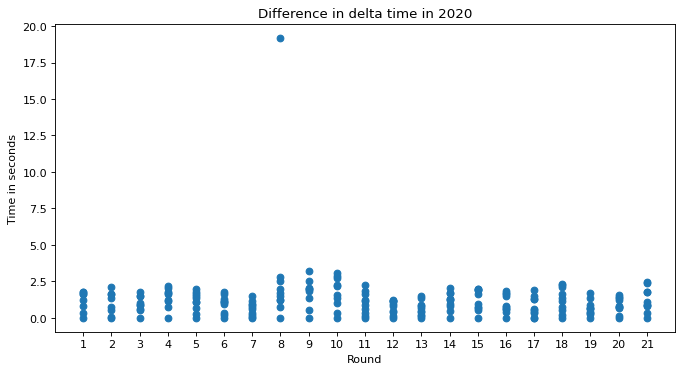

In [8]:
### All rounds in 2020 apart from 14 to show the difference between the front runners
### and the bottom of the pack.
s21 = merged.query('season == 2016 & q_delta.notnull()')

x = s21['round'].values
y = s21['q_delta'].values

fig, axs = plt.subplots(1, dpi=80)
fig.set_size_inches(10, 5)

axs.set_title('Difference in delta time in 2020')
axs.set_xlabel('Round')
axs.set_ylabel('Time in seconds')
axs.set_xticks(np.unique(s21['round']))
axs.scatter(x, y)

In [79]:
### Pole conversion rate

pole_sitters = merged.query('grid == 1')

pole_winners = pole_sitters.query('podium == 1')
pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
print(f'Pole conversion: {pole_conversion}%')

Pole conversion: 53.8%


In [80]:
### Pole conversion rate

grid_poles = merged.query('grid == 1')
grid_poles['wins'] = grid_poles.podium.apply(lambda x: 1 if x == 1 else 0)
driver_poles = grid_poles.groupby(
    'driver'
    ).agg({
        'wins': 'sum',
        'round': 'size'
    }
).reset_index()
driver_poles
pole_conversion = round((len(pole_winners)/ len(pole_sitters)) * 100, 1)
print(f'Pole conversion: {pole_conversion}%')

Pole conversion: 53.8%
